In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files
files.upload()

Saving data_trial.csv to data_trial.csv


{'data_trial.csv': b'Gender,AGE,TEMP,SPO2,PULSE,IR\r\nFemale,26,100,92,109,1\r\nFemale,23,96,93,109,0\r\nMale,26,96,93,72,1\r\nFemale,24,103,93,121,0\r\nMale,48,100,85,80,1\r\nMale,24,103,86,45,1\r\nMale,45,100,94,80,1\r\nMale,48,100,92,109,1\r\nMale,26,101,85,70,1\r\nMale,26,97,94,113,1\r\nMale,26,102,93,68,1\r\nMale,30,98,86,109,1\r\nMale,36,100,92,45,1\r\nMale,36,96,85,121,1\r\nMale,26,100,93,69,1\r\nFemale,54,100,92,76,1\r\nFemale,41,97,87,71,1\r\nMale,48,96,93,70,1\r\nMale,26,96,93,109,0\r\nFemale,54,100,86,121,1\r\nMale,26,97,93,69,1\r\nFemale,26,102,93,69,1\r\nFemale,47,97,93,106,1\r\nFemale,49,96,92,50,0\r\nMale,57,96,85,121,1\r\nFemale,47,100,92,72,1\r\nMale,29,100,93,120,1\r\nFemale,30,103,93,80,1\r\nFemale,26,96,93,71,0\r\nMale,35,100,94,60,1\r\nMale,26,103,93,109,1\r\nFemale,46,100,86,70,0\r\nMale,47,103,94,69,1\r\nMale,29,96,95,121,1\r\nMale,66,100,91,109,1\r\nFemale,63,99,93,121,1\r\nMale,59,100,93,109,1\r\nFemale,26,100,93,70,1\r\nFemale,72,100,84,109,1\r\nMale,57,96,93,

In [3]:
data=pd.read_csv('data_trial.csv')

In [4]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR
0,Female,26,100,92,109,1
1,Female,23,96,93,109,0
2,Male,26,96,93,72,1
3,Female,24,103,93,121,0
4,Male,48,100,85,80,1
...,...,...,...,...,...,...
2400,Male,65,103,93,109,1
2401,Male,26,96,84,109,1
2402,Female,39,100,94,70,1
2403,Male,38,100,83,69,1


In [5]:
len(data)

2405

In [6]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR'], dtype='object')

In [7]:

data['IR'].value_counts()

1    2028
0     377
Name: IR, dtype: int64

In [8]:
data['TEMP'].value_counts()

100    820
96     449
97     380
103    177
101    157
102    156
99     150
98      70
104     25
105     21
Name: TEMP, dtype: int64

In [9]:
data['PULSE'].value_counts()

109    592
121    357
69     187
106    155
71     149
70     130
72     107
73      91
68      86
58      57
66      51
50      49
78      36
63      34
76      31
80      30
75      28
60      27
120     26
59      25
103     25
116     24
52      24
55      23
45      22
100     15
113     13
90      11
Name: PULSE, dtype: int64

In [10]:
data['SPO2'].value_counts()

93    777
92    421
85    351
86    237
84    233
94    154
87     92
91     45
95     38
88     37
83     13
96      6
89      1
Name: SPO2, dtype: int64

In [11]:
data.loc[(data.SPO2.between(80,100)) & (data.TEMP.between(97,99)) & (data.PULSE.between(60,75)),"Covid"]=0


In [12]:
data['Covid'].value_counts()

0.0    216
Name: Covid, dtype: int64

In [13]:
data['Covid'].fillna(1.0,inplace = True)

In [14]:
data['Covid'].value_counts()

1.0    2189
0.0     216
Name: Covid, dtype: int64

In [15]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,Female,26,100,92,109,1,1.0
1,Female,23,96,93,109,0,1.0
2,Male,26,96,93,72,1,1.0
3,Female,24,103,93,121,0,1.0
4,Male,48,100,85,80,1,1.0
...,...,...,...,...,...,...,...
2400,Male,65,103,93,109,1,1.0
2401,Male,26,96,84,109,1,1.0
2402,Female,39,100,94,70,1,1.0
2403,Male,38,100,83,69,1,1.0


In [16]:
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])

In [17]:
data

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,0,26,100,92,109,1,1.0
1,0,23,96,93,109,0,1.0
2,1,26,96,93,72,1,1.0
3,0,24,103,93,121,0,1.0
4,1,48,100,85,80,1,1.0
...,...,...,...,...,...,...,...
2400,1,65,103,93,109,1,1.0
2401,1,26,96,84,109,1,1.0
2402,0,39,100,94,70,1,1.0
2403,1,38,100,83,69,1,1.0


In [18]:
data['Covid'].value_counts()

1.0    2189
0.0     216
Name: Covid, dtype: int64

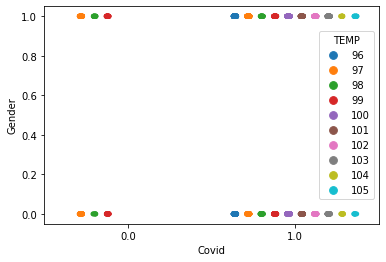

In [19]:
sns.stripplot(x ='Covid', y ='Gender', data = data,
              jitter = True, hue ='TEMP', dodge = True)

Text(0.5, 0, 'Corona Detection')

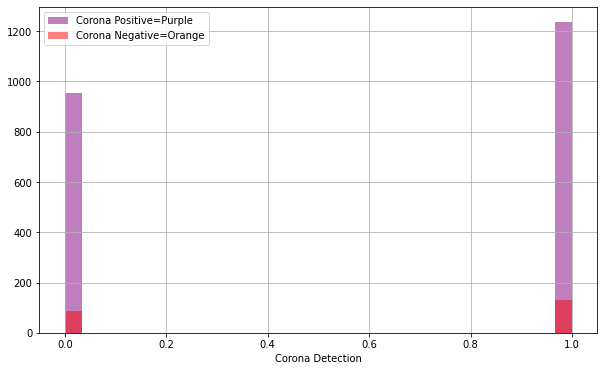

In [20]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['Gender'].hist(alpha=0.5,color='purple',
                                              bins=30,label='Corona Positive=Purple')
data[data['Covid']==0]['Gender'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Negative=Orange')
plt.legend()
plt.xlabel('Corona Detection')

Text(0.5, 0, 'Corona Detection')

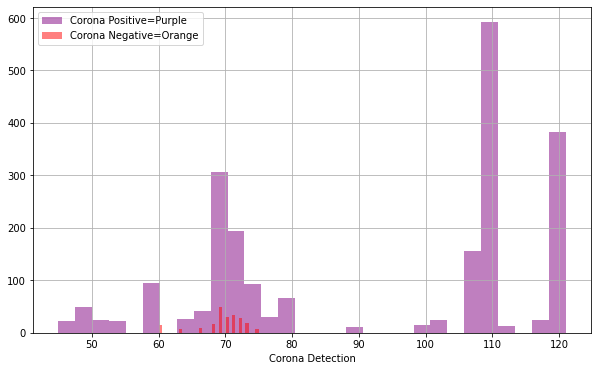

In [21]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['PULSE'].hist(alpha=0.5,color='purple',
                                              bins=30,label='Corona Positive=Purple')
data[data['Covid']==0]['PULSE'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Negative=Orange')
plt.legend()
plt.xlabel('Corona Detection')

Text(0.5, 0, 'Corona Detection')

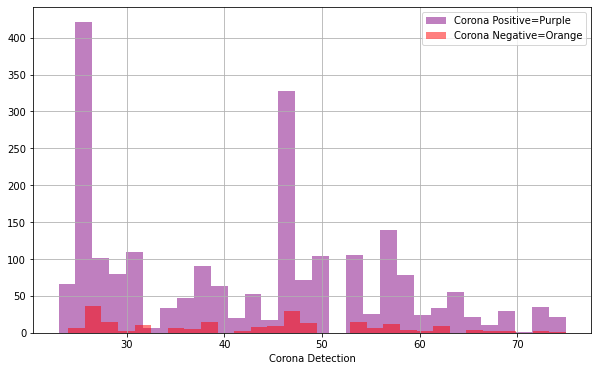

In [22]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['AGE'].hist(alpha=0.5,color='purple',
                                              bins=30,label='Corona Positive=Purple')
data[data['Covid']==0]['AGE'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Negative=Orange')
plt.legend()
plt.xlabel('Corona Detection')

Text(0.5, 0, 'Corona Detection')

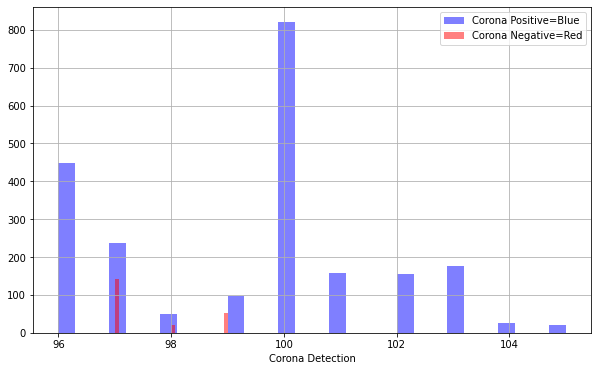

In [23]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['TEMP'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Corona Positive=Blue')
data[data['Covid']==0]['TEMP'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Negative=Red')
plt.legend()

plt.xlabel('Corona Detection')

Text(0.5, 0, 'Corona Detection')

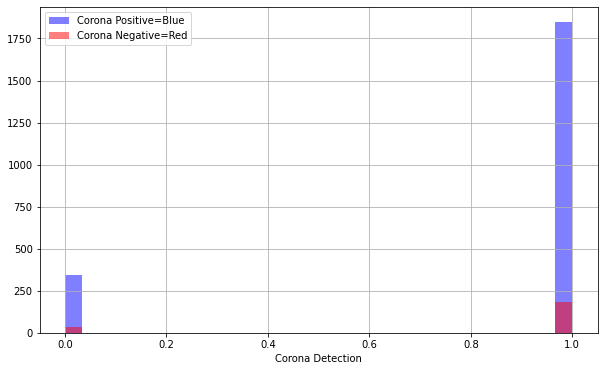

In [24]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['IR'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Corona Positive=Blue')
data[data['Covid']==0]['IR'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Negative=Red')
plt.legend()

plt.xlabel('Corona Detection')

Text(0.5, 0, 'Corona Detection')

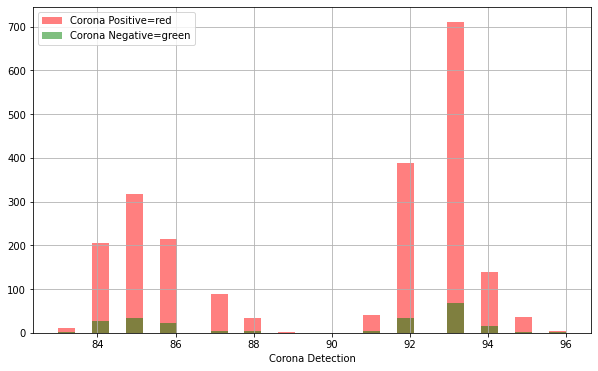

In [25]:
plt.figure(figsize=(10,6))
data[data['Covid']==1]['SPO2'].hist(alpha=0.5,color='red',
                                              bins=30,label='Corona Positive=red')
data[data['Covid']==0]['SPO2'].hist(alpha=0.5,color='green',
                                              bins=30,label='Corona Negative=green')
plt.legend()

plt.xlabel('Corona Detection')

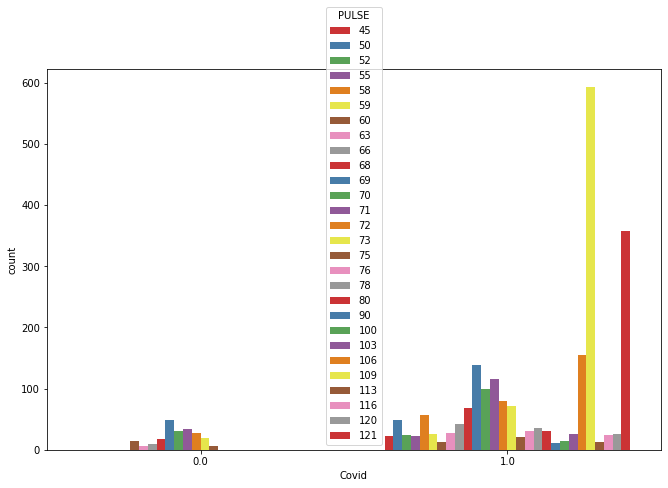

In [26]:
plt.figure(figsize=(11,7))
sns.countplot(x='Covid',hue='PULSE',data=data,palette='Set1')

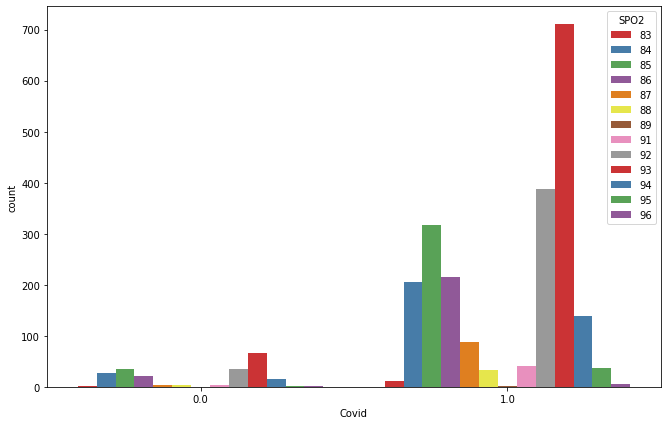

In [27]:
plt.figure(figsize=(11,7))
sns.countplot(x='Covid',hue='SPO2',data=data,palette='Set1')

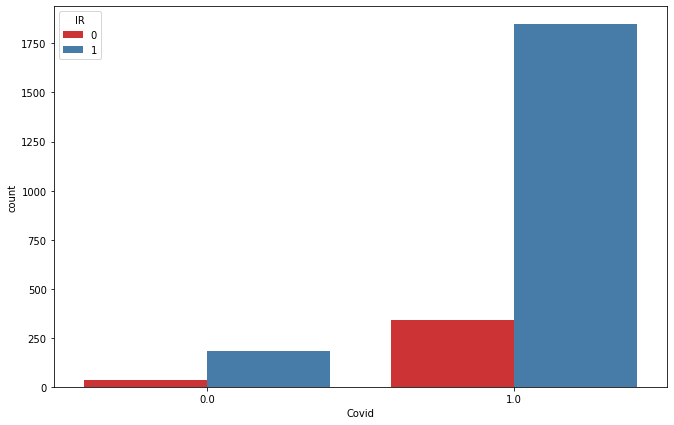

In [28]:
plt.figure(figsize=(11,7))
sns.countplot(x='Covid',hue='IR',data=data,palette='Set1')

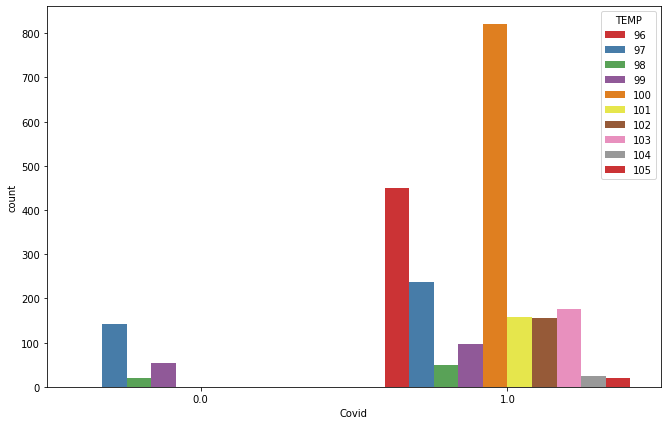

In [29]:
plt.figure(figsize=(11,7))
sns.countplot(x='Covid',hue='TEMP',data=data,palette='Set1')

In [30]:
data_na = list(data.isnull().sum())
data.isnull().sum()

Gender    0
AGE       0
TEMP      0
SPO2      0
PULSE     0
IR        0
Covid     0
dtype: int64

In [31]:
for i in range(len(data_na)):
  print(len(data)-data_na[i])

2405
2405
2405
2405
2405
2405
2405


In [32]:
data_new = data.dropna()

In [33]:
data_new

,Gender,AGE,TEMP,SPO2,PULSE,IR,Covid
0,0,26,100,92,109,1,1.0
1,0,23,96,93,109,0,1.0
2,1,26,96,93,72,1,1.0
3,0,24,103,93,121,0,1.0
4,1,48,100,85,80,1,1.0
...,...,...,...,...,...,...,...
2400,1,65,103,93,109,1,1.0
2401,1,26,96,84,109,1,1.0
2402,0,39,100,94,70,1,1.0
2403,1,38,100,83,69,1,1.0


In [34]:
#data has no null values so data aftwer cleaning remains same 
print("original data", len(data))
print("data after elimination", len(data_new))
print("Difference", len(data)-len(data_new))

original data 2405
data after elimination 2405
Difference 0


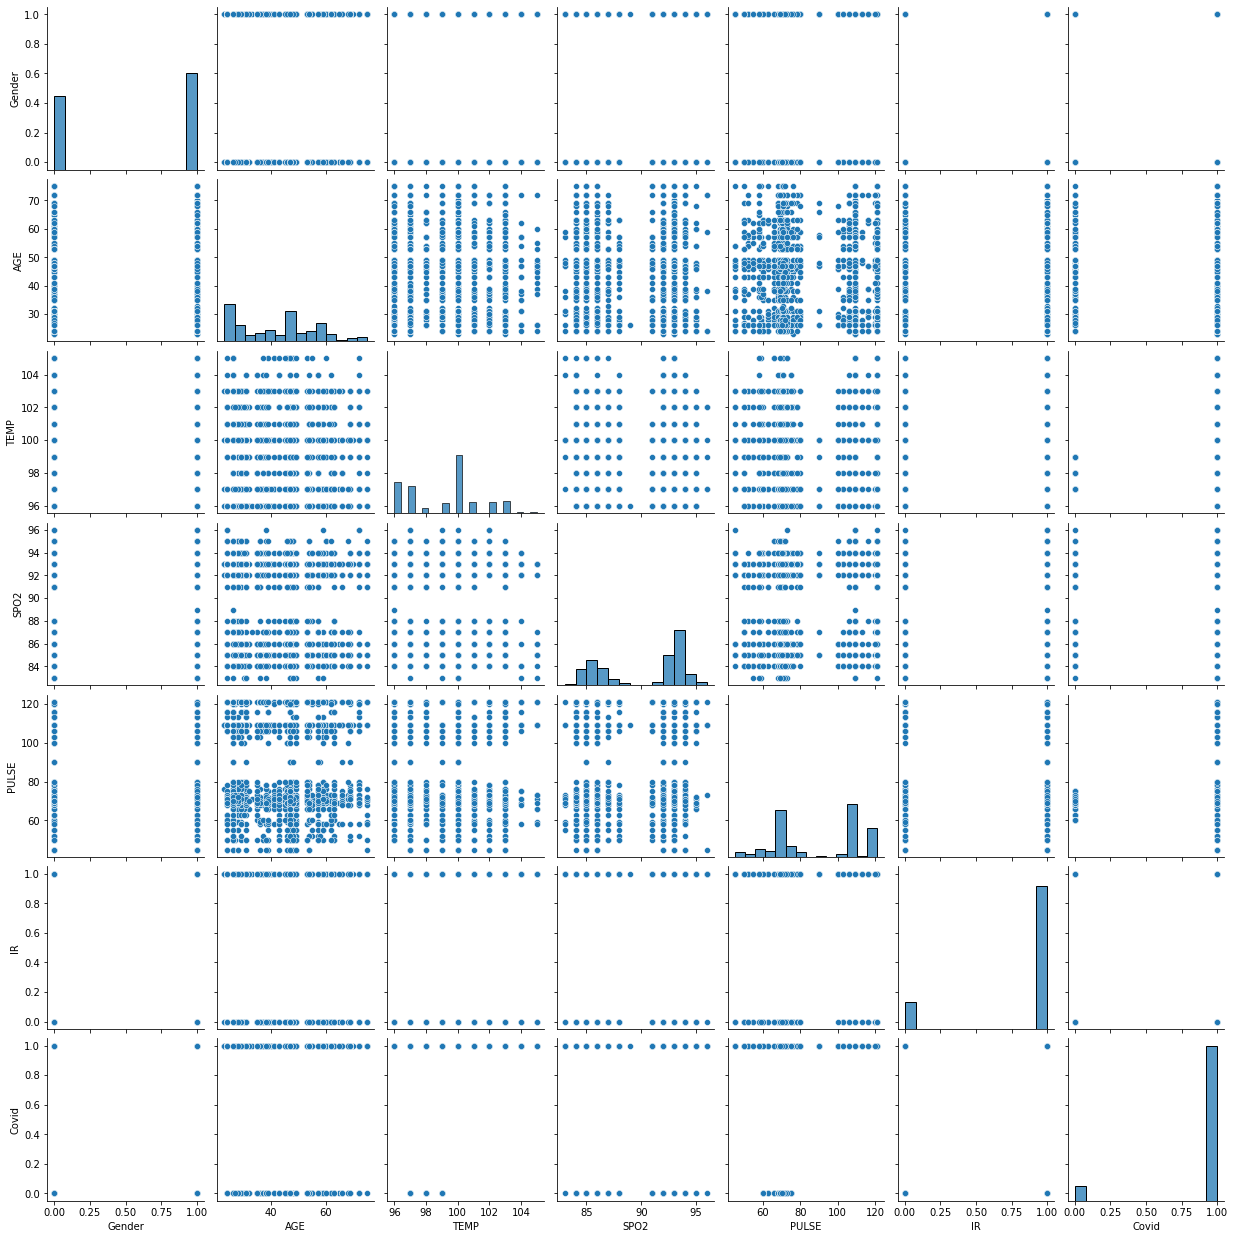

In [35]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


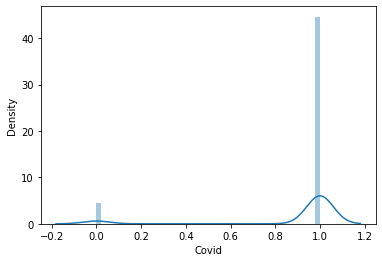

In [36]:
sns.distplot(data['Covid'])

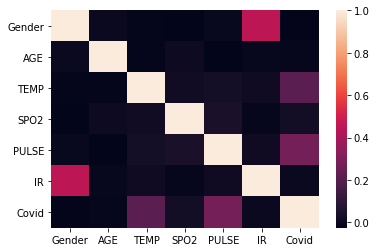

In [37]:
sns.heatmap(data.corr())

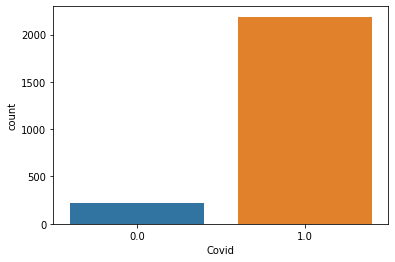

In [38]:
sns.countplot(x='Covid',data=data)


In [39]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR', 'Covid'], dtype='object')

In [40]:
X = data[['TEMP', 'PULSE', 'SPO2','IR']]
y = data['Covid']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [43]:
print("no of Covid-19 Parameters  data", len(X_train))
print("no of Actual Corona Patients detected", len(X_test))
print("no of Covid-19 Parameter training data", len(y_train))
print("no of Covid_Patient Detected By Model ", len(y_test))

no of Covid-19 Parameters  data 1683
no of Actual Corona Patients detected 722
no of Covid-19 Parameter training data 1683
no of Covid_Patient Detected By Model  722


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
logmodel.score(X_train, y_train) #Training Accuracy

0.8983957219251337

In [48]:
logmodel.score(X_test, y_test) #Testing Accuracy

0.9002770083102493

In [49]:
logmodel.score(X, y) #overall processed data

0.898960498960499

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        65
         1.0       0.91      0.99      0.95       657

    accuracy                           0.90       722
   macro avg       0.45      0.49      0.47       722
weighted avg       0.83      0.90      0.86       722



In [54]:
y_fin=predictions.tolist()
fin_co=data['Covid'].tolist()

In [55]:
nf = len(fin_co)
nf

2405

In [56]:
nyf=len(y_fin)
nyf

722

In [57]:
nf_fin= fin_co[0:722]


In [58]:
len(nf_fin) 

722

In [59]:
nf_fin.count(1)

666

In [60]:
y_fin.count(1)

715

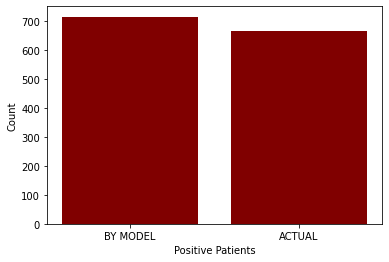

In [61]:
data_bar = {'BY MODEL':y_fin.count(1), 'ACTUAL':nf_fin.count(1)}
detect = list(data_bar.keys())
value = list(data_bar.values())
plt.xlabel("Positive Patients")
plt.ylabel("Count")
plt.bar(detect,value, color ='maroon', width = 0.8)
plt.show()

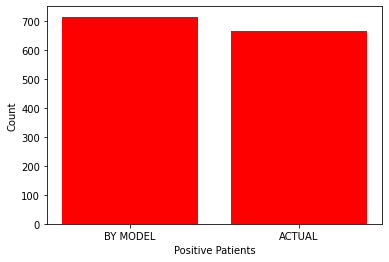

In [62]:
data_bar = {'BY MODEL':y_fin.count(1), 'ACTUAL':nf_fin.count(1)}
detect = list(data_bar.keys())
value = list(data_bar.values())
plt.xlabel("Positive Patients")
plt.ylabel("Count")
plt.bar(detect,value, color ='red', width = 0.8)
plt.show()

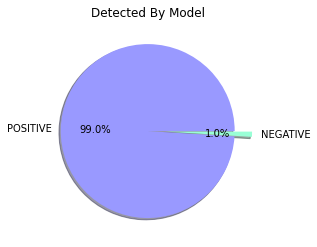

In [63]:
data_pie = {'POSITIVE':y_fin.count(1), 'NEGATIVE':y_fin.count(0)}
mylabels = list(data_pie.keys())
value=list(data_pie.values())
myexplode = [0, 0.2]
mycolors = ["#9999ff", "#99ffd6"]
plt.pie(value, labels = mylabels,explode = myexplode, shadow=True, autopct='%1.1f%%', colors=mycolors)
plt.title('Detected By Model')
plt.show() 

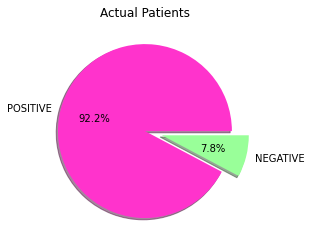

In [64]:
data_pie1 = {'POSITIVE':nf_fin.count(1), 'NEGATIVE':nf_fin.count(0)}
mylabels1 = list(data_pie1.keys())
value1=list(data_pie1.values())
myexplode = [0, 0.2]
mycolors1 = ["#ff33cc", "#99ff99"]
plt.pie(value1, labels = mylabels1 ,explode = myexplode, shadow=True,autopct='%1.1f%%', colors=mycolors1)
plt.title('Actual Patients')
plt.show()

In [65]:
data.columns

Index(['Gender', 'AGE', 'TEMP', 'SPO2', 'PULSE', 'IR', 'Covid'], dtype='object')

In [75]:
x_temp = []
x_oxy=[]
x_pulse=[]

In [68]:
y_fin=predictions.tolist()


In [69]:
nf_fin= fin_co[0:722]


In [70]:
pip install wandb


     |████████████████████████████████| 1.8MB 23.1MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 133kB 52.7MB/s 
     |████████████████████████████████| 174kB 48.3MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=e6fc1d702c27177aba686d45c5238d50da529b029785bd60ebfe8f559fd5c73f
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=40a4a1272169bf4fa47b5f736706742ecee8c68e37a296bd2658aafd45318066
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [71]:
labels="Covid-Positive","Covid-Negative"

In [76]:
wandb.sklearn.plot_confusion_matrix(y_test, predictions, labels)


In [77]:
import wandb
wandb.init(project="visualize-sklearn")

_runtime,41
_timestamp,1622285351
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [ ]:
pip install scikit-plot

In [95]:
labels="Covid-Negative","Covid-Positive"

In [92]:
wandb.sklearn.plot_confusion_matrix(y_test, predictions, labels)


In [97]:
wandb.sklearn.plot_confusion_matrix(y_test, predictions, labels)


In [96]:
import wandb
wandb.init(project="visualize-sklearn")

_runtime,13
_timestamp,1622288424
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [81]:
pip install wandb

In [83]:
import wandb

In [85]:
labels="Covid-Positive","Covid-Negative"

In [90]:
wandb.sklearn.plot_confusion_matrix(y_test, predictions, labels)

In [91]:
wandb.init(project="visualize-sklearn")


_runtime,62
_timestamp,1622287456
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [ ]:
import scikitplot as skplt

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, predictions)

In [ ]:
cm

In [ ]:
from sklearn.metrics import plot_confusion_matrix

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
len(predictions)

In [ ]:
actual_status=data['Covid']

In [ ]:
len(actual_status)

In [ ]:
actual_status=actual_status[0:722]

In [ ]:
pip install wandb

In [ ]:
from yellowbrick.classifier import discrimination_threshold
from sklearn.linear_model import LogisticRegression
from yellowbrick.datasets import load_spam

X, y = load_spam()
visualizer = discrimination_threshold(
    LogisticRegression(multi_class="auto", solver="liblinear"), X, y
)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import plotly.express as px

fpr, tpr, thresholds = roc_curve(actual_status, predictions)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

In [ ]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');